## Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import re

## Read CSV

In [3]:
nquestions=500_000
df = pd.read_csv('Train.csv', nrows=nquestions)
df

,Id,Title,Body,Tags
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents
...,...,...,...,...
499995,499996,Access a Controller return value in a View,<p>In my controller I have this method</p>\n\n...,php cakephp cakephp-1.3
499996,499997,css left right column fixed,<p>im working on a 3 column webpage. i would l...,css
499997,499998,Encryption of Data that should be stored in a ...,<p>I'm new to C# and ASP.NET and I have to do ...,c# asp.net .net encryption key
499998,499999,Is there a way of switching connectivity on an...,<p>I am planning to start writing some android...,android unit-testing android-emulator automate...


## Exploratory Data Analysis

In [4]:
def tags_iter():
    return (set(tags.split()) for tags in df['Tags'])

In [5]:
tags_count = {}
for tags in tags_iter():
    for tag in tags:
        tags_count[tag] = tags_count.get(tag, 0) + 1

In [6]:
len(tags_count)

30429

Text(0.5, 0, 'Number of tags')

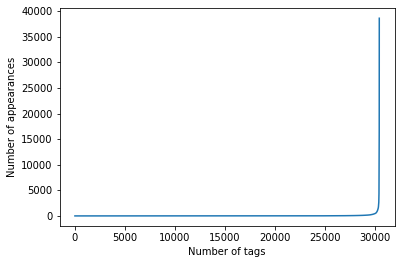

In [7]:
plt.plot(sorted(tags_count.values()))
plt.ylabel('Number of appearances')
plt.xlabel('Number of tags')

In [8]:
# Most common tags
n_top = 200
tags_top_sorted = sorted(tags_count.keys(), key=lambda x: -tags_count[x])[:n_top]
tags_top = set(tags_top_sorted)
tags_top_sorted[:10]

['c#',
 'java',
 'php',
 'javascript',
 'android',
 'jquery',
 'c++',
 'python',
 'iphone',
 'asp.net']

In [9]:
count = 0
for tags in tags_iter():
    for tag in tags:
        if tag in tags_top:
            count+=1
            break
print(f"Contains {count} questions out of {nquestions}")
print(f"Question coverage: {100 * count / nquestions}%")

Contains 411582 questions out of 500000
Question coverage: 82.3164%


## Build $X_{train}$ and $Y_{train}$

In [10]:
# Select rows with at least one tag in top
mask = df['Tags'].map(
    lambda field: any(
        # Look if tag is contained in the top
        tag in tags_top \
            for tag in field.split()
    )
)
df_train = df[mask]

### Getting $Y_{train}$

In [11]:
from sklearn.preprocessing import MultiLabelBinarizer

In [12]:
mlb = MultiLabelBinarizer()
mlb.fit([tags_top])

MultiLabelBinarizer()

In [13]:
# Now mlb can transform list of tags to multilabel format (1,0,...,0,1,0)
mlb.transform([
    ['c#', 'algorithm'],
    ['c++', 'java', 'javascript'],
    ['python']
])

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 

In [14]:
# Convert tags to binarized output
Y_train = df_train['Tags'].map(lambda s: s.split())

# Ignore unknown class warning since all tag sets contain at least one tag in tag_top
Y_train = mlb.transform(Y_train)

# Verify all entries contain at least one tag
print(f"All good: {all(np.any(Y_train, axis=1))}")

/home/raulm/Documents/training/tagging/.venv/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:870: UserWarning: unknown class(es) ['.a', '.app', '.aspxauth', '.bash-profile', '.class-file', '.doc', '.each', '.emf', '.exe', '.htpasswd', '.lib', '.mov', '.net-1.0', '.net-1.1', '.net-2.0', '.net-3.0', '.net-3.5', '.net-4.0', '.net-4.0-beta-2', '.net-4.5', '.net-assembly', '.net-authorization', '.net-cf-3.5', '.net-client-profile', '.net-framework', '.net-framework-source', '.net-framework-version', '.net-gadgeteer', '.net-install', '.net-micro-framework', '.net-reflector', '.net-remoting', '.net-security', '.net-services', '.net2.0', '.net3.5', '.net4.0', '.netrc', '.nettiers', '.obj', '.post', '.procmailrc', '.profile', '.railsrc', '.rdlc', '.sdf', '.vdproj', '.wav', '.when', '.x', '1080p', '10gbethernet', '11g', '120hz', '16bit', '1and1', '1wire', '2-3-4-tree', '2-legged', '2-tier', '2003', '2007', '2010', '2013', '24bit', '24hour', '256color', '2d', '2d-array', '2d-games', '

All good: True


### Getting $X_{train}$

In [15]:
def clean_text(text):
    """
    Normalize format of words, ready to be splitted
    """
    # lowercase
    text = text.lower()
    text = text.strip()
    # Abbreviations
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"\'s", "", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    # Delete numbers
    text = re.sub(r"[0-9]+", " ", text)
    # HTML sequences
    text = re.sub(r"&lt", " less than ", text)
    text = re.sub(r"&gt", " greater than ", text)
    text = re.sub(r"=", " equal ", text)
    # Delete HTML tags
    text = re.sub("<(\"[^\"]*\"|'[^']*'|[^'\">])*>", '', text)
    # Delete period, comma, quotation, interrogation, admiration
    text = re.sub(r'[\.,\'\(\)\?!\[\]:\"\-~_]', ' ', text)
    # Replace slash
    text = re.sub(r'/', ' ', text)
    # Replace line breaks (and spaces)
    text = re.sub(r'\n+', ' ', text)
    
    return text

In [16]:
## Append body and title together
X_train_texts = (df_train['Body'] + ' ' + df_train['Title'])
# Clean text
X_train_texts = X_train_texts.map(clean_text)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tfidf = TfidfVectorizer(stop_words='english', max_features=2_000, binary=True)

In [19]:
X_train = tfidf.fit_transform(X_train_texts)

In [20]:
with open('feat_names.txt', 'w') as f:
    for c in tfidf.get_feature_names_out():
        f.write(c)
        f.write('\n')

## Building model

In [177]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [179]:
clf = OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=3)

### Training

In [180]:
clf.fit(X_train, Y_train)

OneVsRestClassifier(estimator=LogisticRegression(solver='sag'), n_jobs=3)

## Testing the model

In [22]:
class TFIDFAutotagger:
    def __init__(self, mlb, vectorizer, clf, ntop=5):
        self.mlb = mlb
        self.vectorizer = vectorizer
        self.clf = clf
        self.ntop = ntop
        self.ids_to_results = MultiLabelBinarizer()
        self.ids_to_results.fit([range(n_top)])
    
    def _preprocess(self, texts):
        return self.vectorizer.transform(texts)
    
    def _classify(self, inp):
        return self.clf.predict_proba(inp)
    
    def _postprocess(self, results):
        return self.mlb.inverse_transform(results)
    
    def _get_top(self, results_probs):
        return np.argpartition(results_probs, -self.ntop)[:, -self.ntop:]
    
    def __call__(self, texts):
        vec_inp = self._preprocess(texts)
        #print(vec_inp)
        probs_list = self._classify(vec_inp)
        #print(probs_list)
        ids = self._get_top(probs_list)
        #print(ids)
        results = self.ids_to_results.transform(ids)
        #print(results)
        tags = self._postprocess(results)
        #print(tags)
        
        return tags

In [235]:
tfidf_tagger = TFIDFAutotagger(mlb, tfidf, clf)

In [236]:
tfidf_tagger(["Help with my c++ code, im having a hard time trying to do a for loop and getting a syntax error"])

[('c', 'c#', 'c++', 'iphone', 'objective-c')]

#### Save and load model

In [272]:
import pickle

# Save to file in the current working directory
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(tfidf_tagger, file)

In [23]:
import pickle

# Load from file
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'rb') as file:
    tfidf_tagger = pickle.load(file)

## Getting more precise results with Zero-Shot Text Classification

In [24]:
from transformers import pipeline

In [25]:
class Autotagger:
    task = "zero-shot-classification" 
    model = "facebook/bart-large-mnli" 
    
    def __init__(self, tf_idf_clf):
        self.zero_shot_clf = pipeline(self.task, self.model)
        self.tf_idf_clf = tf_idf_clf
    
    def predict(self, text):
        tags = self.tf_idf_clf([text])[0]
        return self.zero_shot_clf(text, tags)
    

In [26]:
tagger = Autotagger(tfidf_tagger)

Downloading:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

In [28]:
tagger.predict("Help with my c++ code")

{'sequence': 'Help with my c++ code',
 'labels': ['c++', 'c', 'objective-c', 'c#', 'iphone'],
 'scores': [0.7897552251815796,
  0.1451275646686554,
  0.05567922070622444,
  0.0049303388223052025,
  0.00450770603492856]}